# Insurance Claims - Fraud Detection.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"F:\insurance.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df=df.drop(['_c39'],axis=1)

In [6]:
# Check for '?' in dataset

round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

months_as_customer              0.0 %
age                             0.0 %
policy_number                   0.0 %
policy_bind_date                0.0 %
policy_state                    0.0 %
policy_csl                      0.0 %
policy_deductable               0.0 %
policy_annual_premium           0.0 %
umbrella_limit                  0.0 %
insured_zip                     0.0 %
insured_sex                     0.0 %
insured_education_level         0.0 %
insured_occupation              0.0 %
insured_hobbies                 0.0 %
insured_relationship            0.0 %
capital-gains                   0.0 %
capital-loss                    0.0 %
incident_date                   0.0 %
incident_type                   0.0 %
collision_type                 17.8 %
incident_severity               0.0 %
authorities_contacted           0.0 %
incident_state                  0.0 %
incident_city                   0.0 %
incident_location               0.0 %
incident_hour_of_the_day        0.0 %
number_of_ve

In [7]:
#Replacing '?' with 'nan'

df = df.replace('?', np.nan)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# EDA 

<AxesSubplot:xlabel='age', ylabel='count'>

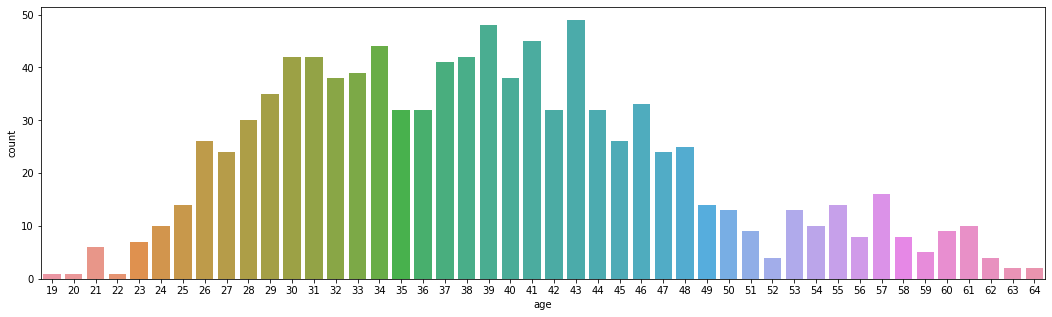

In [9]:
plt.figure(figsize=(18,5))
sns.countplot(x='age',data=df)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

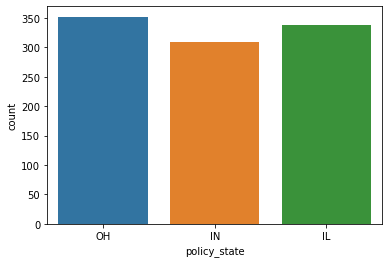

In [10]:
sns.countplot(x='policy_state',data=df)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

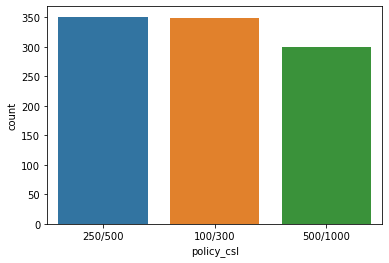

In [11]:
sns.countplot(x='policy_csl',data=df)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

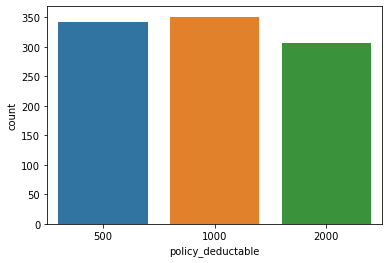

In [12]:
sns.countplot(x='policy_deductable',data=df)

<AxesSubplot:xlabel='policy_annual_premium', ylabel='fraud_reported'>

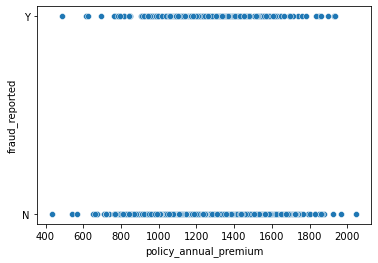

In [13]:
sns.scatterplot(data=df, x='policy_annual_premium', y='fraud_reported')

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

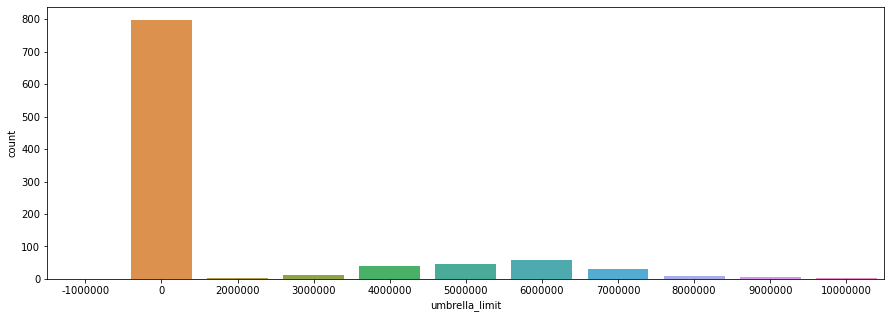

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='umbrella_limit',data=df)

<AxesSubplot:xlabel='insured_zip', ylabel='fraud_reported'>

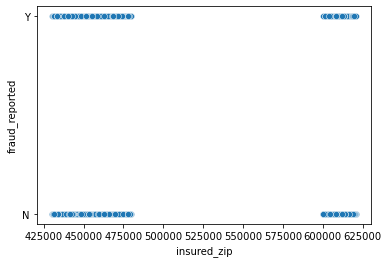

In [15]:
sns.scatterplot(data=df, x='insured_zip', y='fraud_reported')

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

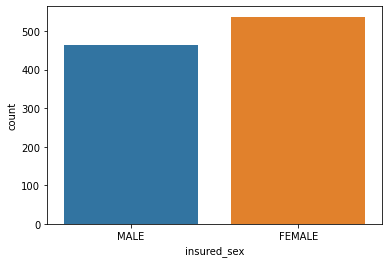

In [16]:
sns.countplot(x='insured_sex',data=df)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

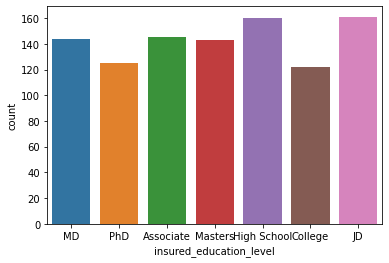

In [17]:
sns.countplot(x='insured_education_level',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

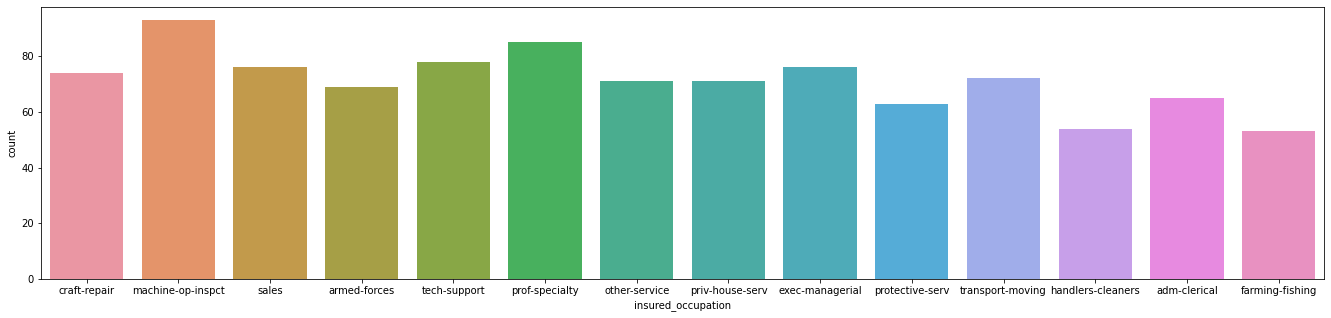

In [18]:
plt.figure(figsize=(23,5))
sns.countplot(x='insured_occupation',data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

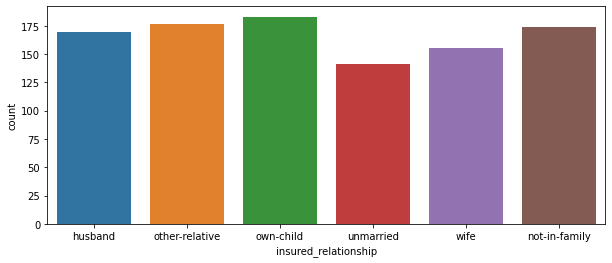

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(x='insured_relationship',data=df)

<AxesSubplot:xlabel='capital-gains', ylabel='fraud_reported'>

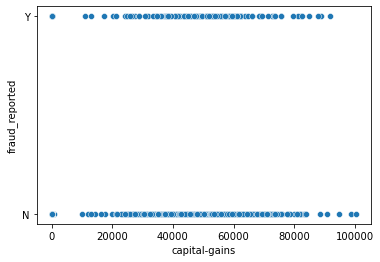

In [20]:
sns.scatterplot(data=df, x='capital-gains', y='fraud_reported')

<AxesSubplot:xlabel='capital-loss', ylabel='fraud_reported'>

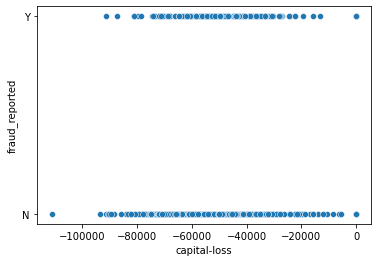

In [21]:
sns.scatterplot(data=df, x='capital-loss', y='fraud_reported')

<AxesSubplot:xlabel='incident_type', ylabel='count'>

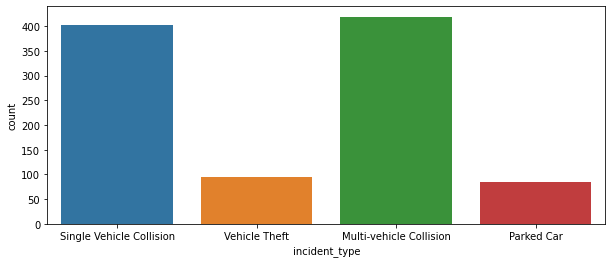

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_type',data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

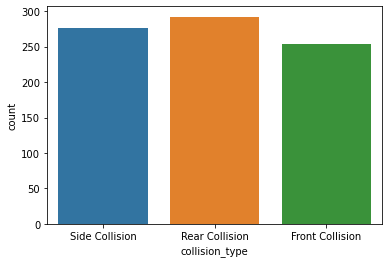

In [23]:
sns.countplot(x='collision_type',data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

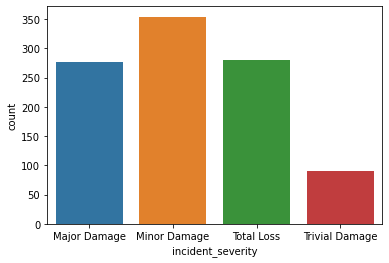

In [24]:
sns.countplot(x='incident_severity',data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

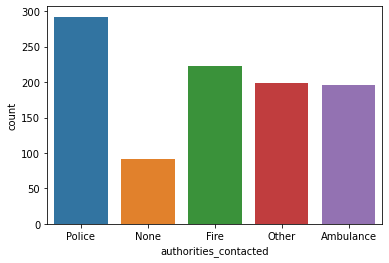

In [25]:
sns.countplot(x='authorities_contacted',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

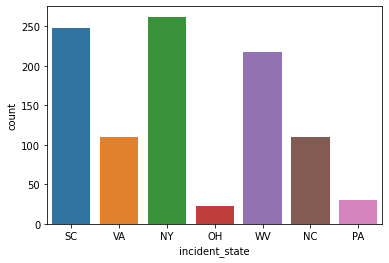

In [26]:
sns.countplot(x='incident_state',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

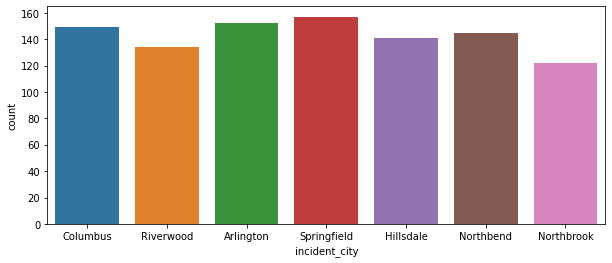

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_city',data=df)

<AxesSubplot:xlabel='incident_location', ylabel='fraud_reported'>

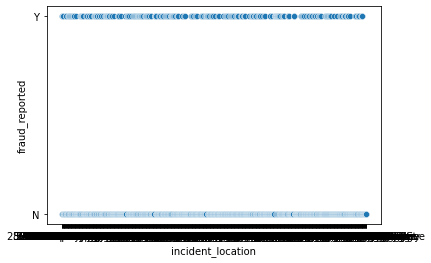

In [28]:
sns.scatterplot(data=df, x='incident_location', y='fraud_reported')

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

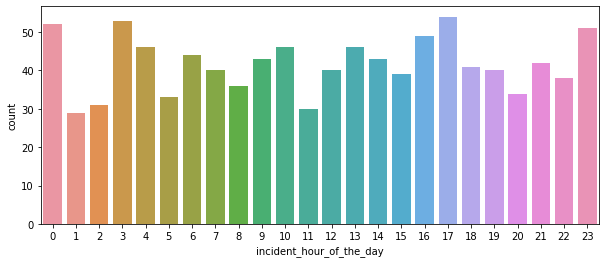

In [29]:
plt.figure(figsize=(10,4))
sns.countplot(x='incident_hour_of_the_day',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

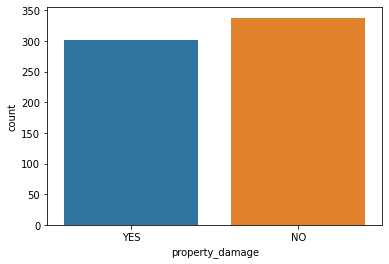

In [30]:
sns.countplot(x='property_damage',data=df)

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

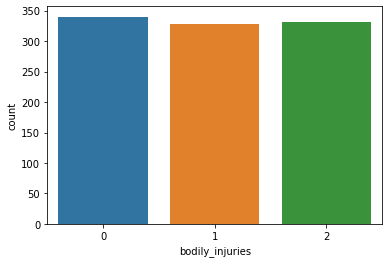

In [31]:
sns.countplot(x='bodily_injuries',data=df)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

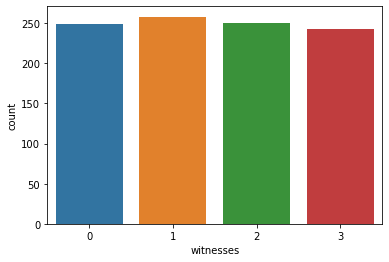

In [32]:
sns.countplot(x='witnesses',data=df)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

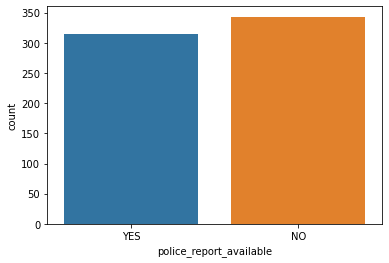

In [33]:
sns.countplot(x='police_report_available',data=df)

<AxesSubplot:xlabel='total_claim_amount', ylabel='fraud_reported'>

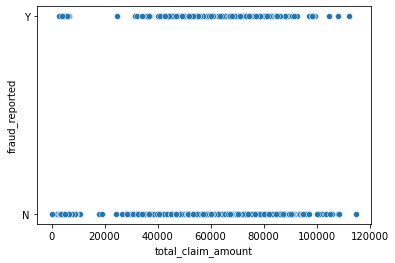

In [34]:
sns.scatterplot(data=df, x='total_claim_amount', y='fraud_reported')

<AxesSubplot:xlabel='injury_claim', ylabel='fraud_reported'>

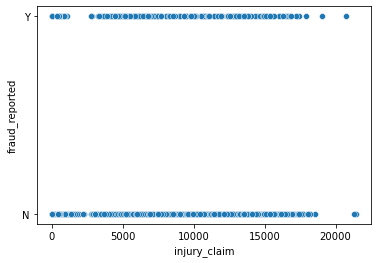

In [35]:
sns.scatterplot(data=df, x='injury_claim', y='fraud_reported')

<AxesSubplot:xlabel='property_claim', ylabel='fraud_reported'>

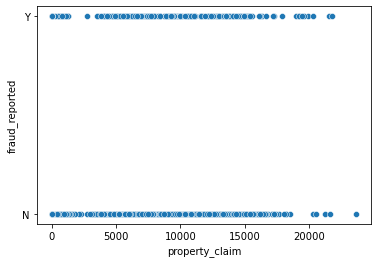

In [36]:
sns.scatterplot(data=df, x='property_claim', y='fraud_reported')

<AxesSubplot:xlabel='vehicle_claim', ylabel='fraud_reported'>

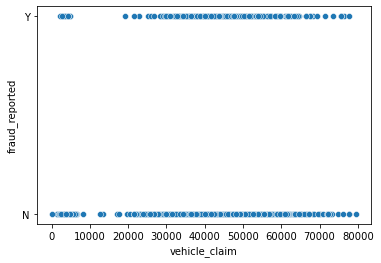

In [37]:
sns.scatterplot(data=df, x='vehicle_claim', y='fraud_reported')

<AxesSubplot:xlabel='auto_make', ylabel='count'>

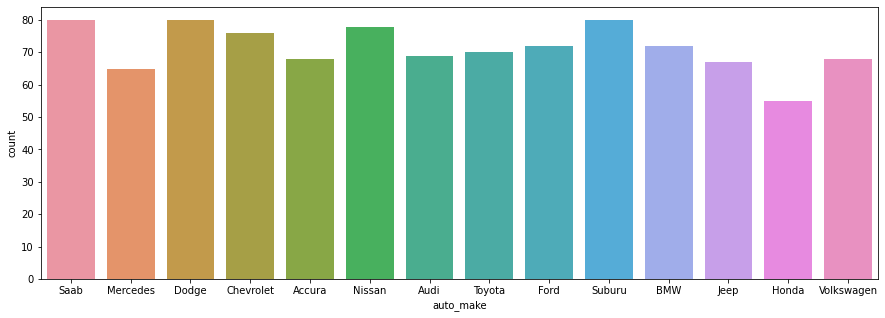

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x='auto_make',data=df)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

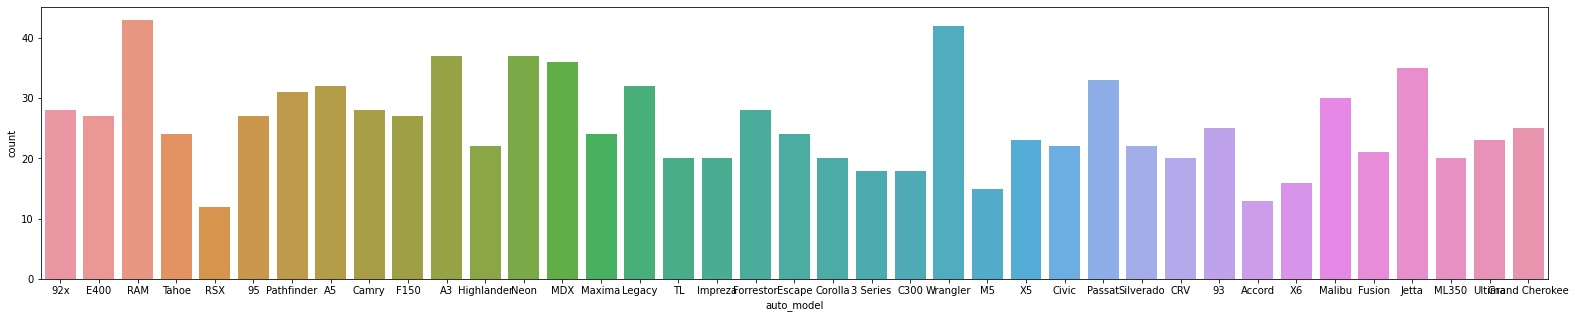

In [39]:
plt.figure(figsize=(27,5))
sns.countplot(x='auto_model',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

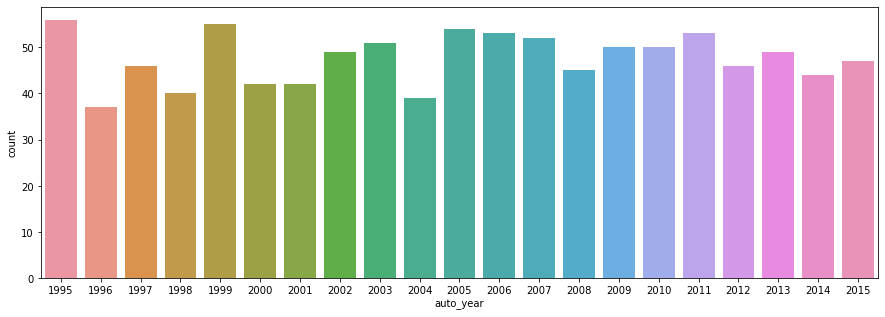

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(x='auto_year',data=df)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

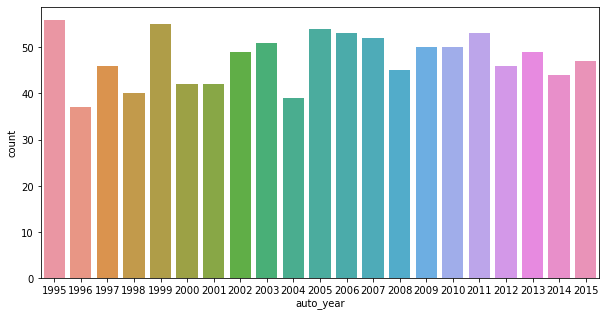

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x='auto_year',data=df)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

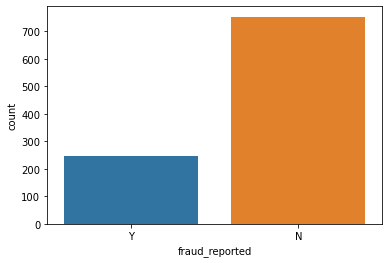

In [42]:
sns.countplot(x='fraud_reported',data=df)

# Correltion

In [43]:
#Changing values of required columns as 1 and 0 

df['fraud_reported'] = df['fraud_reported'].astype('str')
df['police_report_available'] = df['police_report_available'].astype('str')
df['property_damage'] = df['property_damage'].astype('str')
df['insured_sex'] = df['insured_sex'].astype('str')

df = df.replace({'fraud_reported': {'Y': 1, 'N': 0}})
df = df.replace({'police_report_available': {'YES': 1, 'NO': 0}})
df = df.replace({'property_damage': {'YES': 1, 'NO': 0}})
df = df.replace({'insured_sex': {'MALE': 1, 'FEMALE': 0}})

In [44]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,nan,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,Accura,RSX,2009,0


In [45]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.060925,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,0.073337,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.004564,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,-0.009733,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,0.038853,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,0.010688,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,-0.036942,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
insured_sex,0.060925,0.073337,0.004564,-0.009733,0.038853,0.010688,-0.036942,1.000000,-0.020494,-0.021705,0.019290,0.018793,-0.020297,0.042463,-0.023727,0.000924,-0.014868,-0.029609,-0.028247,0.030873
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,-0.020494,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.021705,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863


<AxesSubplot:>

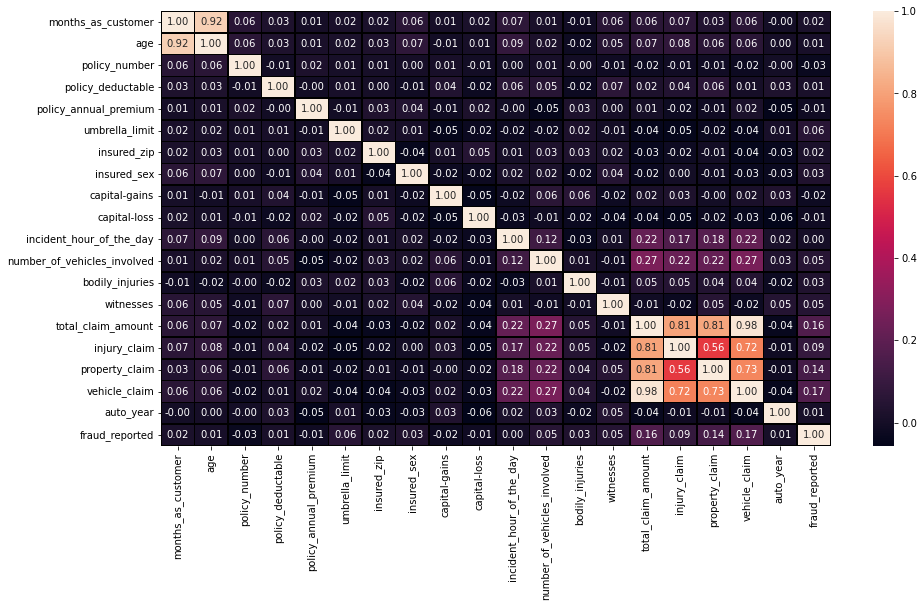

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black",fmt='.2f')

# Describing dataset

In [47]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


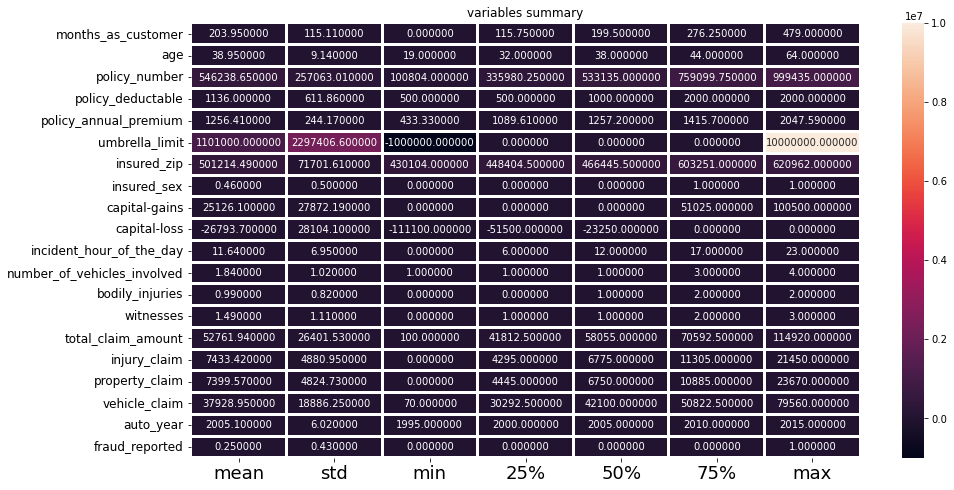

In [48]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('variables summary')
plt.show()

# Outliers checking 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   int64  
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [50]:
df1=df.drop(['policy_bind_date','policy_csl', 'policy_state','insured_education_level','insured_occupation', 'insured_hobbies','insured_relationship','incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','number_of_vehicles_involved','property_damage','police_report_available','auto_make','auto_model'],axis=1)
df1

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,capital-gains,capital-loss,incident_hour_of_the_day,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,521585,1000,1406.91,0,466132,1,53300,0,5,1,2,71610,6510,13020,52080,2004,1
1,228,42,342868,2000,1197.22,5000000,468176,1,0,0,8,0,0,5070,780,780,3510,2007,1
2,134,29,687698,2000,1413.14,5000000,430632,0,35100,0,7,2,3,34650,7700,3850,23100,2007,0
3,256,41,227811,2000,1415.74,6000000,608117,0,48900,-62400,5,1,2,63400,6340,6340,50720,2014,1
4,228,44,367455,1000,1583.91,6000000,610706,1,66000,-46000,20,0,1,6500,1300,650,4550,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,0,20,0,1,87200,17440,8720,61040,2006,0
996,285,41,186934,1000,1436.79,0,608177,0,70900,0,23,2,3,108480,18080,18080,72320,2015,0
997,130,34,918516,500,1383.49,3000000,442797,0,35100,0,4,2,3,67500,7500,7500,52500,1996,0
998,458,62,533940,2000,1356.92,5000000,441714,1,0,0,2,0,1,46980,5220,5220,36540,1998,0


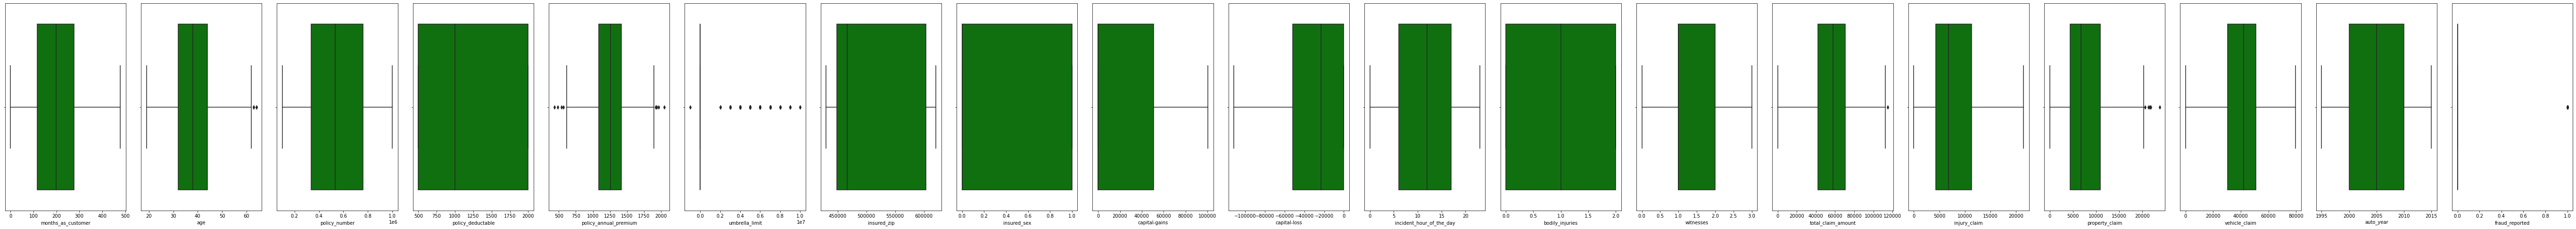

In [51]:
collist=df1.columns.values
ncol=20
nrows=15
plt.figure(figsize=(4*ncol,5*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skewness

In [52]:
df1.skew()

months_as_customer          0.362177
age                         0.478988
policy_number               0.038991
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.806712
insured_zip                 0.816554
insured_sex                 0.148630
capital-gains               0.478850
capital-loss               -0.391472
incident_hour_of_the_day   -0.035584
bodily_injuries             0.014777
witnesses                   0.019636
total_claim_amount         -0.594582
injury_claim                0.264811
property_claim              0.378169
vehicle_claim              -0.621098
auto_year                  -0.048289
fraud_reported              1.175051
dtype: float64

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

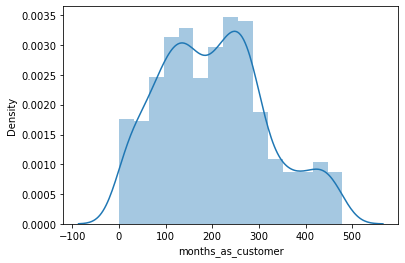

In [53]:
sns.distplot(df1["months_as_customer"])

<AxesSubplot:xlabel='age', ylabel='Density'>

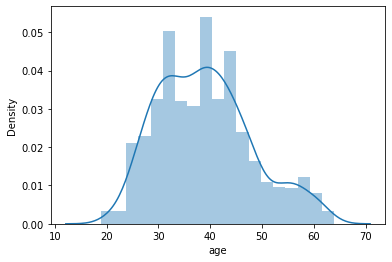

In [54]:
sns.distplot(df1["age"])

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

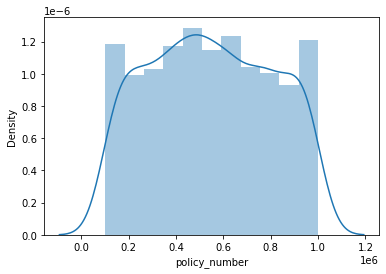

In [55]:
sns.distplot(df1["policy_number"])

<AxesSubplot:xlabel='policy_deductable', ylabel='Density'>

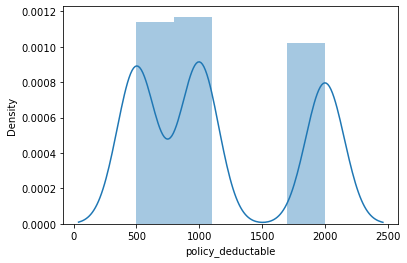

In [56]:
sns.distplot(df1["policy_deductable"])

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

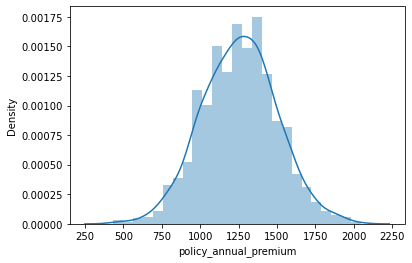

In [57]:
sns.distplot(df1["policy_annual_premium"])

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

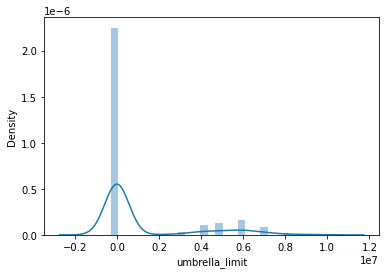

In [58]:
sns.distplot(df1["umbrella_limit"])

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

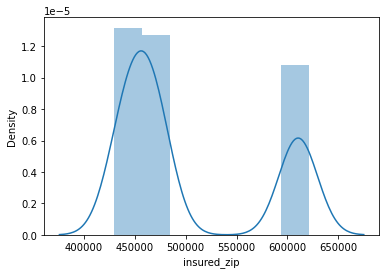

In [59]:
sns.distplot(df1["insured_zip"])

<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

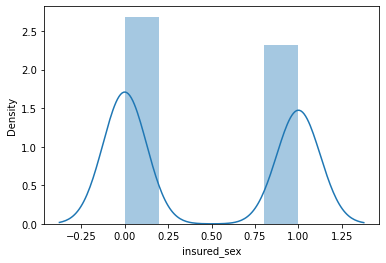

In [60]:
sns.distplot(df1["insured_sex"])

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

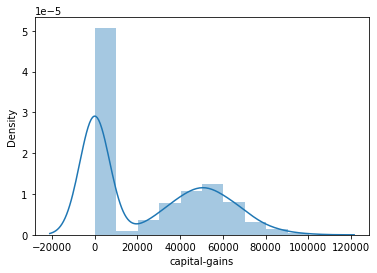

In [61]:
sns.distplot(df1["capital-gains"])

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

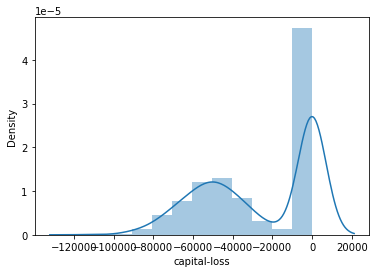

In [62]:
sns.distplot(df1["capital-loss"])

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='Density'>

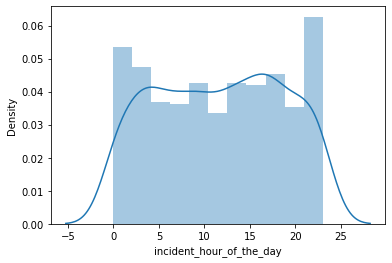

In [63]:
sns.distplot(df1["incident_hour_of_the_day"])

<AxesSubplot:xlabel='bodily_injuries', ylabel='Density'>

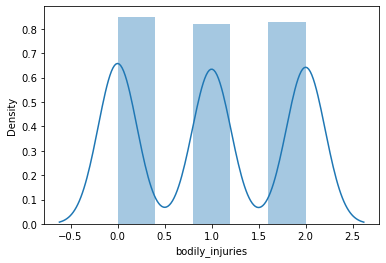

In [64]:
sns.distplot(df1["bodily_injuries"])

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

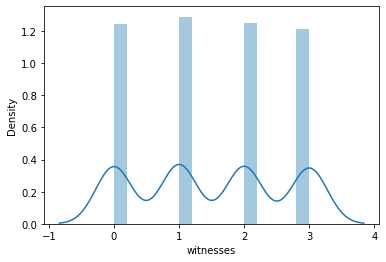

In [65]:
sns.distplot(df1["witnesses"])

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

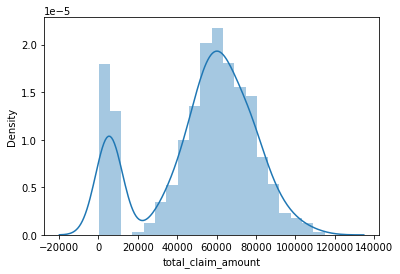

In [66]:
sns.distplot(df1["total_claim_amount"])

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

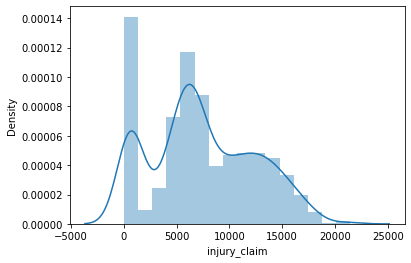

In [67]:
sns.distplot(df1["injury_claim"])

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

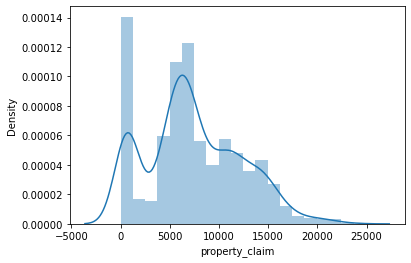

In [68]:
sns.distplot(df1["property_claim"])

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

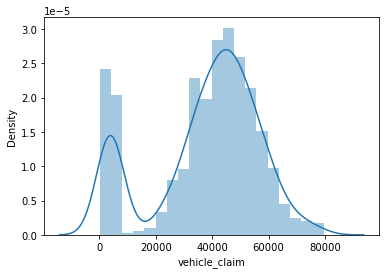

In [69]:
sns.distplot(df1["vehicle_claim"])

<AxesSubplot:xlabel='auto_year', ylabel='Density'>

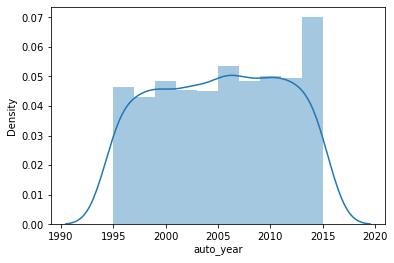

In [70]:
sns.distplot(df1["auto_year"])

<AxesSubplot:xlabel='fraud_reported', ylabel='Density'>

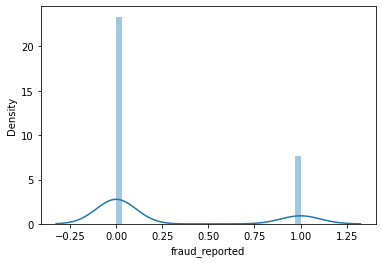

In [71]:
sns.distplot(df1["fraud_reported"])

# Data Cleaning 

In [72]:
delete=pd.DataFrame([
    ["0.012143", "age", "No", "Alot"],
    ["-0.029443", "policy_number", "No", "Alot"],
    ["0.014817", "policy_deductable", "No", "Alot"],
    ["-0.014480", "policy_annual_premium", "No", "Alot"],
    ["0.058622", "umbrella_limit", "No", "Alot"],
    ["0.019368", "insured_zip", "No", "Alot"],
    ["0.030873", "insured_sex", "No", "Alot"],
    ["-0.019173", "capital-gains", "No", "Alot"],
    ["-0.014863", "capital-loss", "No", "Alot"],
    ["0.004316", "incident_hour_of_the_day", "No", "Alot"],
    ["0.051839", "number_of_vehicles_involved", "No", "Alot"],
    ["0.033877", "bodily_injuries", "No", "Alot"],
    ["0.049497", "witnesses", "No", "Alot"],
    ["0.090975", "injury_claim", "No", "Alot"],
    ["0.007928", "auto_year", "No", "Alot"]],
    columns=["Correlation with Target", "Column Name", "Normalised", "Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,0.012143,age,No,Alot
1,-0.029443,policy_number,No,Alot
2,0.014817,policy_deductable,No,Alot
3,-0.014480,policy_annual_premium,No,Alot
4,0.058622,umbrella_limit,No,Alot
5,0.019368,insured_zip,No,Alot
6,0.030873,insured_sex,No,Alot
7,-0.019173,capital-gains,No,Alot
8,-0.014863,capital-loss,No,Alot
9,0.004316,incident_hour_of_the_day,No,Alot


In [73]:
df2=df1.drop(['age','policy_number','policy_deductable', 'policy_annual_premium','umbrella_limit','insured_zip','insured_sex','capital-gains','capital-loss','incident_hour_of_the_day','bodily_injuries','witnesses','injury_claim','auto_year'],axis=1)

In [74]:
df2

,months_as_customer,total_claim_amount,property_claim,vehicle_claim,fraud_reported
0,328,71610,13020,52080,1
1,228,5070,780,3510,1
2,134,34650,3850,23100,0
3,256,63400,6340,50720,1
4,228,6500,650,4550,0
...,...,...,...,...,...
995,3,87200,8720,61040,0
996,285,108480,18080,72320,0
997,130,67500,7500,52500,0
998,458,46980,5220,36540,0


# Removing outliers 

In [75]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
z.shape

(1000, 5)

In [76]:
# threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([0, 1, 2, ..., 2, 3, 4], dtype=int64))


In [77]:
df3=df2[(z<3).all(axis=1)]
print(df.shape)
print(df3.shape)

(1000, 39)
(999, 5)


# Percentage of data loss

In [78]:
loss_percent=((1000-999)/1000)*100
print(loss_percent)

0.1


In [79]:
X = df2.drop(["fraud_reported"],axis=1)
Y = df2['fraud_reported']

# Fixing imbalanced dataset using Oversampling


In [80]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

In [81]:
from collections import Counter
from sklearn.datasets import make_classification

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=28)

In [83]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [84]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: fraud_reported, dtype: object

In [85]:
X_resampled.shape

(1506, 4)

In [86]:
Y_resampled.shape

(1506,)

# Train Test Split

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=42)

In [89]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (800, 4)
X_test shape: (200, 4)
Y_train shape: (800,)
Y_test shape: (200,)


# Modelling data 

In [90]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=34)

In [91]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=34)

In [92]:
Y_pred_log_reg = log_reg.predict(X_test)

In [93]:
# KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [94]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [95]:
Y_pred_knn = knn.predict(X_test)

In [96]:
# Support Vector Classifier

from sklearn.svm import SVC
svc = SVC(random_state=34)

In [97]:
svc.fit(X_train, Y_train)

SVC(random_state=34)

In [98]:
Y_pred_svc = svc.predict(X_test)

In [99]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=34)

In [100]:
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=34)

In [101]:
Y_pred_dec_tree = dec_tree.predict(X_test)

In [102]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=34)

In [103]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=34)

In [104]:
Y_pred_ran_for = ran_for.predict(X_test)

# Evaluating model 

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [106]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 75.5
F1 score: 0.0


In [107]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 71.0
F1 score: 21.62


In [108]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 75.5
F1 score: 0.0


In [109]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 64.5
F1 score: 31.07


In [110]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 72.5
F1 score: 26.67


# Hyperparamter Tuning

In [111]:
log_model = LogisticRegression()

In [112]:
param_grid = [
    {'penalty' :[ 'l1', 'l2', 'elsaticnet', 'none'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['lbfgs','newton-cg', 'lib-linear', 'sag', 'saga'],
     'max_iter' :[10, 100, 250, 500],
    }
]

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
clf = GridSearchCV(log_model, param_grid = param_grid, cv=3, verbose = True, n_jobs = -1)

In [115]:
best_clf = clf.fit(X,Y)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [116]:
best_clf.best_estimator_

LogisticRegression(C=0.0001, max_iter=10, penalty='l1', solver='saga')

In [117]:
print (f'Accuracy - : {best_clf.score(X,Y):.3f}')

Accuracy - : 0.753


# Building a predictive system

In [132]:
X_new = X_test

prediction = log_model.predict(X_new)
print(prediction)

if (prediction[7]==1):
    print('The claim was approved')
else:
    print('The claim was declined')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The claim was declined


# Model saving

In [133]:
import pickle
filename = 'Insurance Fraud Detection.pkl'
pickle.dump(log_reg, open(filename, 'wb'))